# To make a suitable machine learning algorithm to predict if the mushroom is edible or poisonous (e or p) using the given dataset. (Along with other ML algorithms, Naïve Bayes’ Classifier should be applied) Also, if some data pre-processing is necessary do that as well.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Downloads/mushrooms.csv')

In [3]:
pd.set_option('display.max_columns', None)
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g


In [4]:
df.shape

(8124, 23)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [6]:
df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,2,5,4,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,t,b,s,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,4608,3776,5176,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [7]:
df.isna().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

There are no missing values in the dataset

In [8]:
# Changing class values to "1" and "0"s.
df["class"] = [1 if i == "p" else 0 for i in df["class"]]

# Dropping "veil-type" column.
df.drop("veil-type",axis=1,inplace=True)

# To find out which machine learning algorithm will give the best result of predicting if the mushroom is edible or poisonous (e or p) using the given dataset.

In [9]:
y = df["class"] 
x = df.drop(["class"], axis=1)  

LABEL ENCODING

In [10]:
from sklearn.preprocessing import LabelEncoder
label_en=LabelEncoder()
h=[ 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-color', 'ring-number', 'ring-type',
       'spore-print-color', 'population', 'habitat']
for i in np.arange(len(h)):
    x[h[i]] = label_en.fit_transform(x[h[i]])

SPLITING INTO TRAIN AND TEST

In [11]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=0,test_size=0.3)

STANDARDSCALING

In [12]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

This is a classification problem so we are 

1) LogisticRegression

In [13]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(x_train, y_train)

LogisticRegression()

In [14]:
from sklearn.metrics import confusion_matrix, accuracy_score , recall_score , precision_score
y_pred = classifier.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
print('accuracy is',accuracy_score(y_test, y_pred))

[[1221   51]
 [  72 1094]]
accuracy is 0.9495488105004102


2) K Nearest neighbour

In [19]:
from sklearn.neighbors import KNeighborsClassifier
acc_values = []
neighbors = np.arange(2,15)
for k in neighbors : 
    classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski')
    classifier.fit(x_train, y_train)
    y_pred = classifier.predict(x_test)
    acc = accuracy_score(y_test , y_pred)
    acc_values.append(acc)

Text(0, 0.5, 'accuracy')

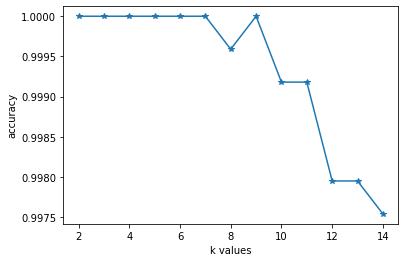

In [18]:
plt.plot(neighbors,acc_values ,'*-')
plt.xlabel('k values')
plt.ylabel('accuracy')

In [20]:
from sklearn.metrics import confusion_matrix, accuracy_score , recall_score , precision_score
y_pred = classifier.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
print('accuracy is',accuracy_score(y_test, y_pred))

[[1272    0]
 [   0 1166]]
accuracy is 1.0


3) SVM

In [21]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(x_train, y_train)

SVC(kernel='linear', random_state=0)

In [22]:
y_pred = classifier.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
print('accuracy is',accuracy_score(y_test, y_pred))

[[1253   19]
 [   5 1161]]
accuracy is 0.9901558654634947


4) Decision Tree

In [23]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [24]:
y_pred = classifier.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
print('accuracy is',accuracy_score(y_test, y_pred))

[[1272    0]
 [   0 1166]]
accuracy is 1.0


5)Random Forest

In [25]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [26]:
y_pred = classifier.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
print('accuracy is',accuracy_score(y_test, y_pred))

[[1272    0]
 [   0 1166]]
accuracy is 1.0


6)Kernal SVM

In [27]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(x_train, y_train)

SVC(random_state=0)

In [28]:
y_pred = classifier.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)


[[1272    0]
 [   0 1166]]


1.0

# Naïve Bayes’ Classifier

In [29]:
from sklearn.naive_bayes import GaussianNB
classifer = GaussianNB()
classifer.fit(x_train,y_train)

GaussianNB()

In [31]:
y_pred = classifer.predict(x_test)
from sklearn.metrics import accuracy_score,confusion_matrix
cs = confusion_matrix(y_test,y_pred)
acc = accuracy_score(y_test,y_pred)
print(cs)
print(acc)

[[1158  114]
 [  93 1073]]
0.9150943396226415


Naïve Bayes’ Classifier (Bernoulli)

In [32]:
from sklearn.naive_bayes import BernoulliNB
cla = BernoulliNB()
cla.fit(x_train,y_train)
y_pred = cla.predict(x_test)
cs = confusion_matrix(y_test,y_pred)
acc = accuracy_score(y_test,y_pred)
print(cs)
print(acc)

[[1227   45]
 [ 201  965]]
0.8990976210008204


All Classification models performs good. K Nearest neighbour , Decision Tree , Random Forest , Kernal SVM gives 100% accuracy respectively.Naïve Bayes’ Classifier gives 91% accuracy